## Imports & Experiment Parameters

In [1]:
import logging
logging.basicConfig(level=logging.ERROR)

import matplotlib.pyplot as plt
from merlion.models.factory import ModelFactory
from online_conformal.dataset import M4
from online_conformal.visualize import plot_simulated_forecast
from time_series import evaluate, summarize_results, visualize
kwargs = dict(target_covs=[0.9], ensemble=False, verbose=True, **M4("Hourly")[0])

## Get Results of LGBM

Forecasting: 100%|██████████| 143/143 [00:33<00:00,  4.33it/s]


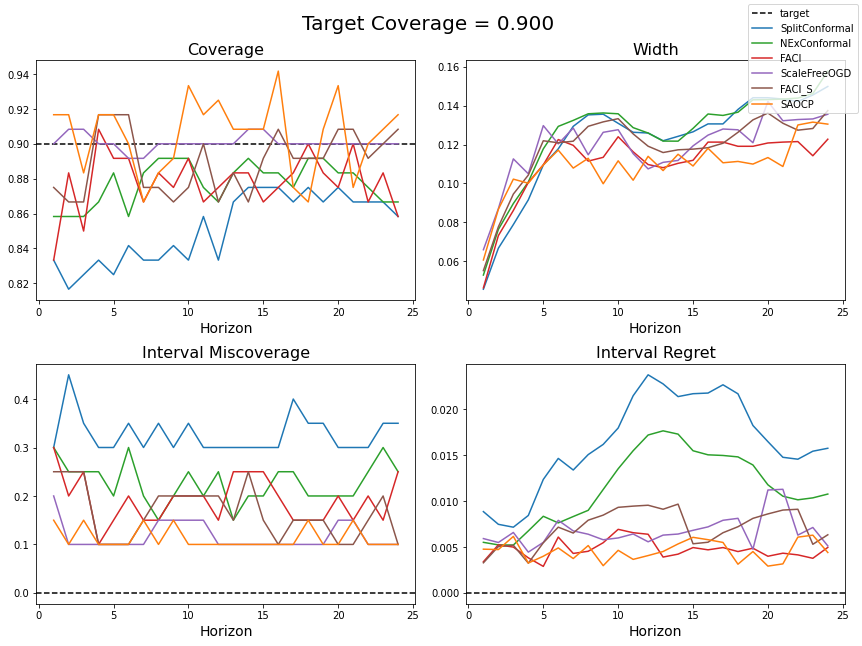

In [2]:
lgbm = dict(name="LGBMForecaster")
lgbm_results = evaluate(lgbm, **kwargs)
visualize(summarize_results(lgbm_results))
plt.show()

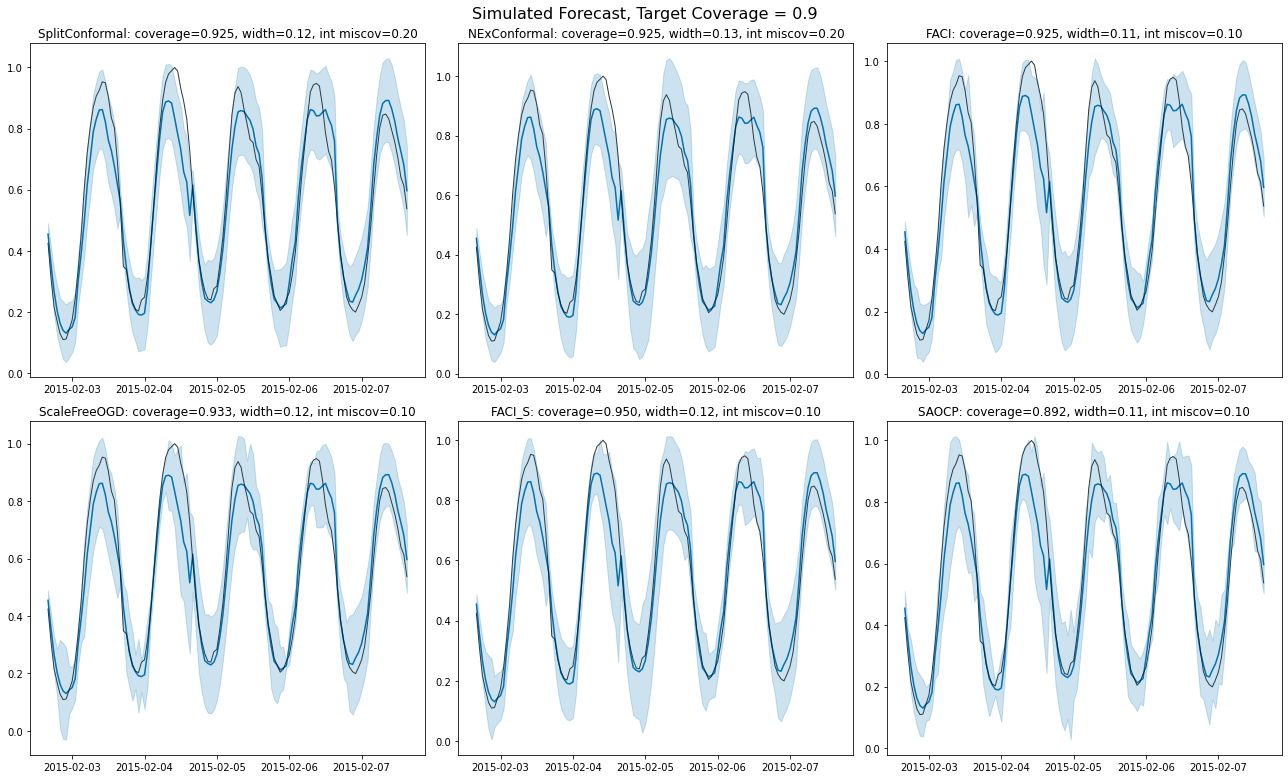

In [3]:
plot_simulated_forecast(lgbm_results[0.9])

## Get Results of ARIMA

Forecasting: 100%|██████████| 143/143 [00:28<00:00,  5.01it/s]


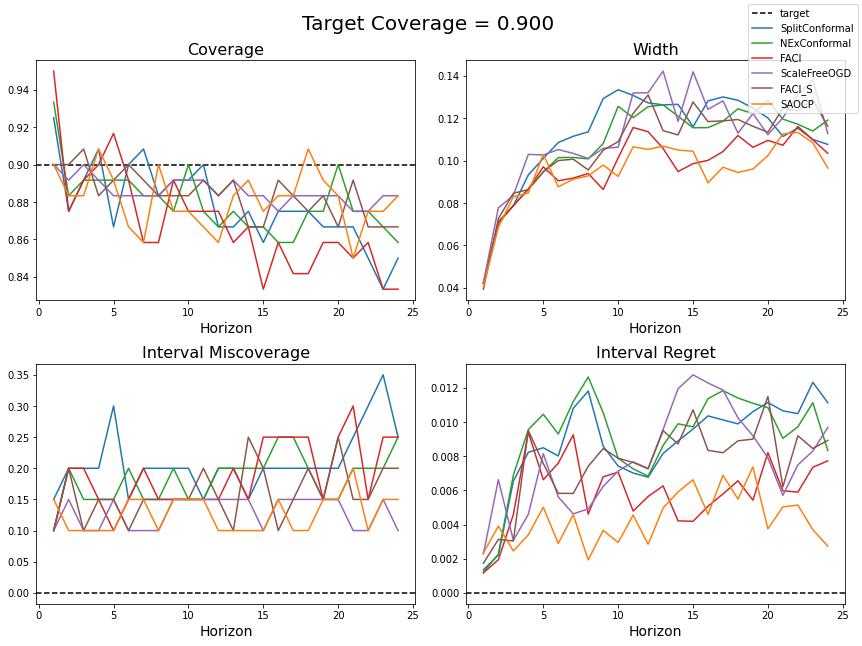

In [4]:
arima = dict(name="Arima", order=(10, "auto", 10), transform=dict(name="Identity"))
arima_results = evaluate(arima, **kwargs)
visualize(summarize_results(arima_results))
plt.show()

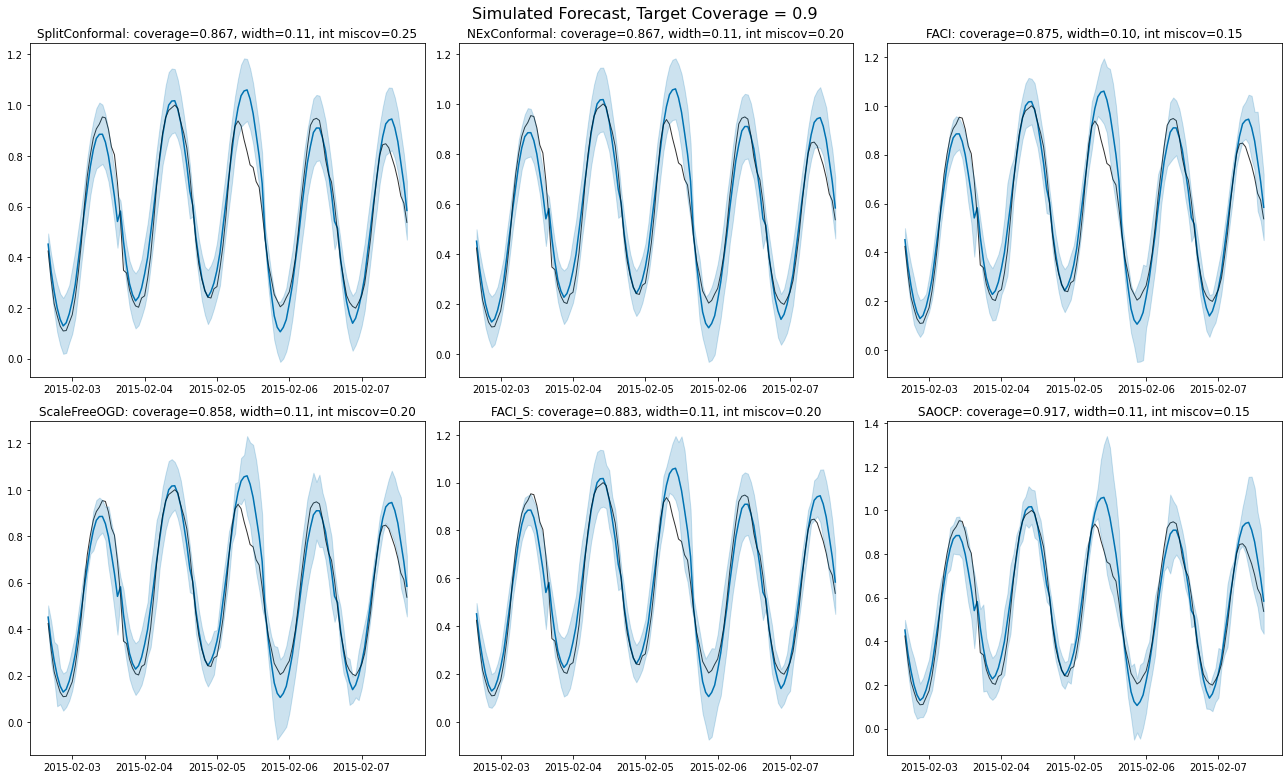

In [5]:
plot_simulated_forecast(arima_results[0.9])

## Get Results of Prophet

Model Training:   0%|          | 0/12 [00:00<?, ?it/s]INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /var/folders/y3/7fy2wxd55z17z54wgqcrvgv00000gq/T/tmpsix7_xw5/e5h0dhx4.json
DEBUG:cmdstanpy:input tempfile: /var/folders/y3/7fy2wxd55z17z54wgqcrvgv00000gq/T/tmpsix7_xw5/3x5fyhs8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91441', 'data', 'file=/var/folders/y3/7fy2wxd55z17z54wgqcrvgv00000gq/T/tmpsix7_xw5/e5h0dhx4.json', 'init=/var/folders/y3/7fy2wxd55z17z54wgqcrvgv00000gq/T/tmpsix7_xw5/3x5fyhs8.json', 'output', 'file=/private/var/folders/y3/7fy2wxd55z17z54wgqcrvgv00000gq/T/tmpsc73zlpe/prophet_model-20230129132019.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:20:19 - cmdstanpy - INFO - Chain [1

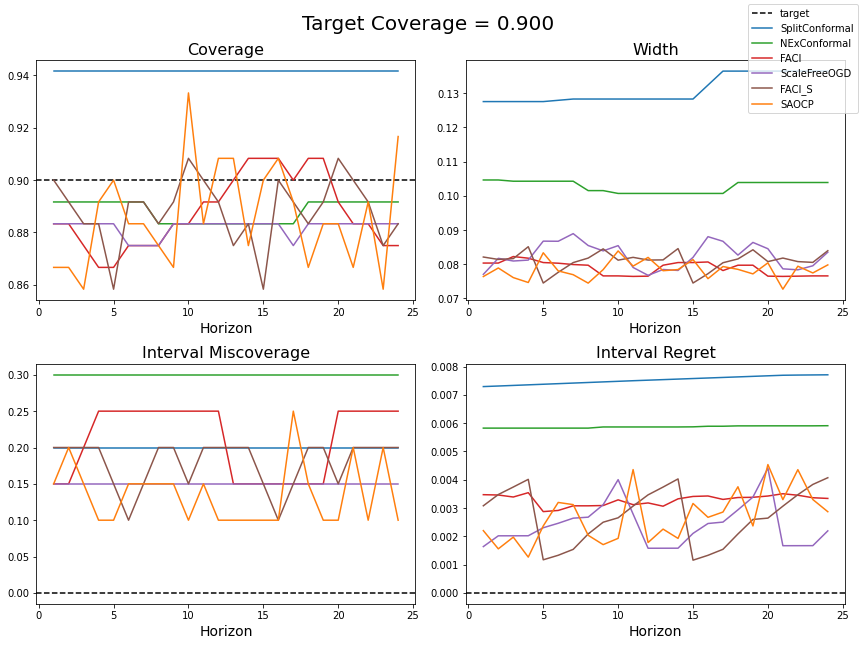

In [6]:
prophet = dict(name="Prophet")
prophet_results = evaluate(prophet, **kwargs)
visualize(summarize_results(prophet_results))
plt.show()

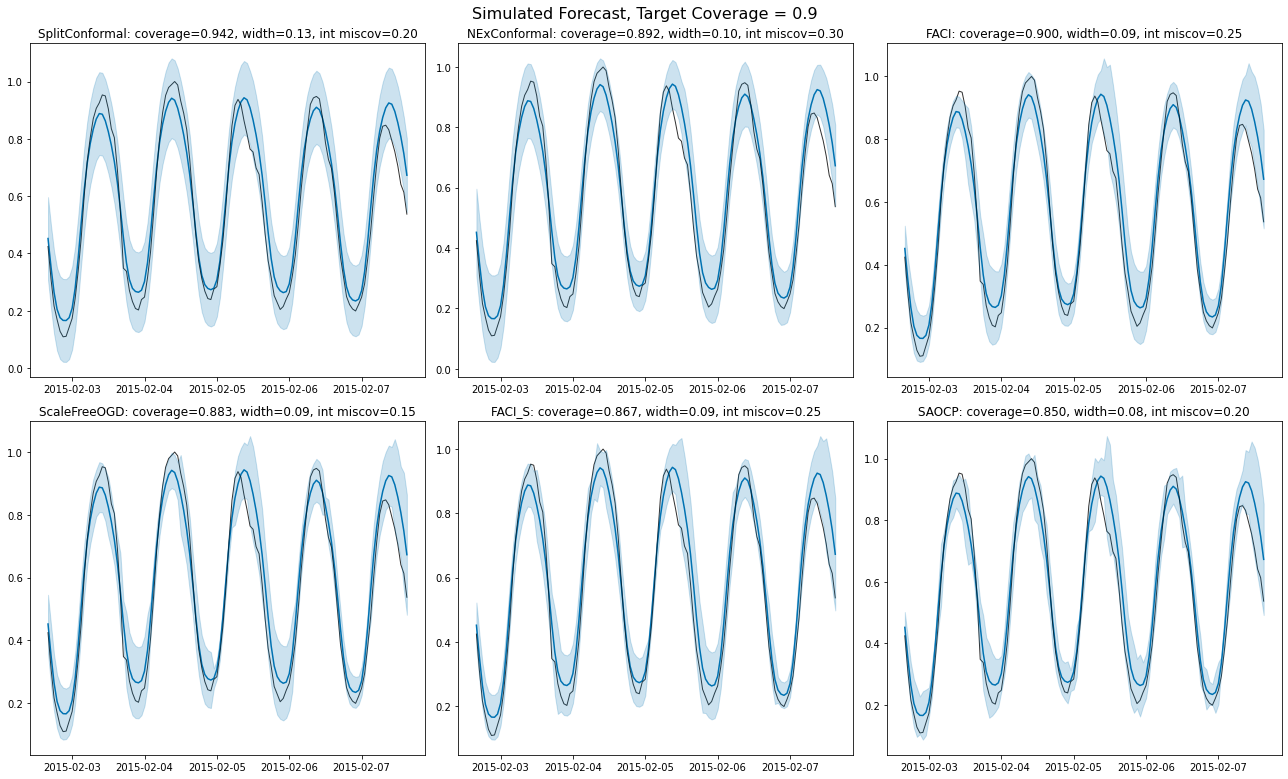

In [7]:
plot_simulated_forecast(prophet_results[0.9])